In [ ]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease


In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_indo = stopwords.words("indonesian") + list(punctuation)

### Import Data

In [ ]:
df = pd.read_excel("polisi_tweet_1.xlsx", "Sheet2")
df

,tweet,label
0,keluarga korban kanjuruhan menggugat pidana pa...,Negatif
1,anggap remeh sidang kode etik sih hendra dihuk...,Positif
2,ngkong setan mulyadi kemana suaranya tewasnya ...,Negatif
3,sih hendra deh sah tsk ditahan kasusnya deh p ...,Positif
4,mahasiswa fisipol ugm melompat lantai hotel ja...,Positif
...,...,...
6141,banding vonis hakim,Negatif
6142,saudara polisi musuh,Negatif
6143,potensi timbulkan pertimbangantidak kokmerenda...,Positif
6144,kalo gue pemain persebaya gue dukung isilopnya...,Negatif


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['label_cat']= label_encoder.fit_transform(df['label'])

df['label_cat'].unique()

array([0, 1])

In [ ]:
df.head()

,tweet,label,label_cat
0,keluarga korban kanjuruhan menggugat pidana pa...,Negatif,0
1,anggap remeh sidang kode etik sih hendra dihuk...,Positif,1
2,ngkong setan mulyadi kemana suaranya tewasnya ...,Negatif,0
3,sih hendra deh sah tsk ditahan kasusnya deh p ...,Positif,1
4,mahasiswa fisipol ugm melompat lantai hotel ja...,Positif,1


In [ ]:
df.label.value_counts(normalize=True)

Negatif    0.674422
Positif    0.325578
Name: label, dtype: float64

### Dataset Spliting

In [ ]:
X = df.tweet
y = df.label_cat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5654,), (492,), (5654,), (492,))

### Training Model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
gsp.svm_params

{'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [ ]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)),
    ('algo', SVC(max_iter=500,probability=True))
])


model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\A442UV\miniconda3\envs\jcop_wv\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(
C:\Users\A442UV\miniconda3\envs\jcop_wv\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 1.368979599359222, 'algo__gamma': 0.36749049453053273}
0.7946586487442518 0.6834093609736044 0.6869918699186992


In [ ]:
from jcopml.plot import plot_confusion_matrix,plot_classification_report,plot_roc_curve

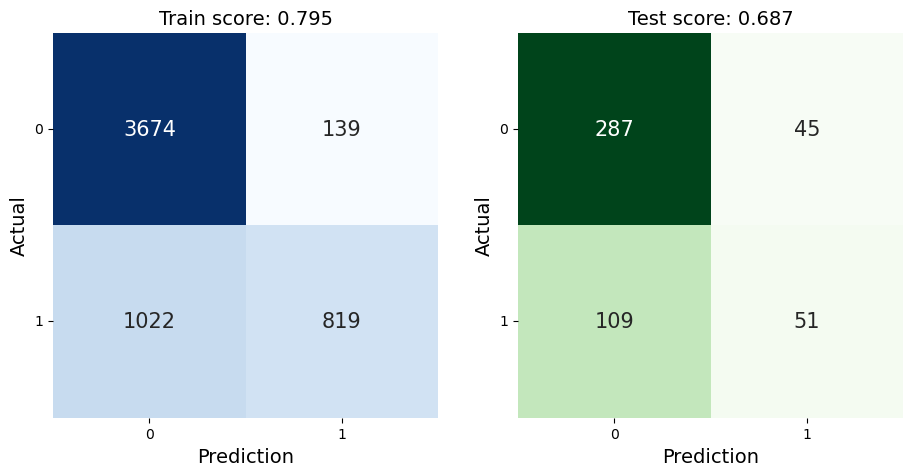

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

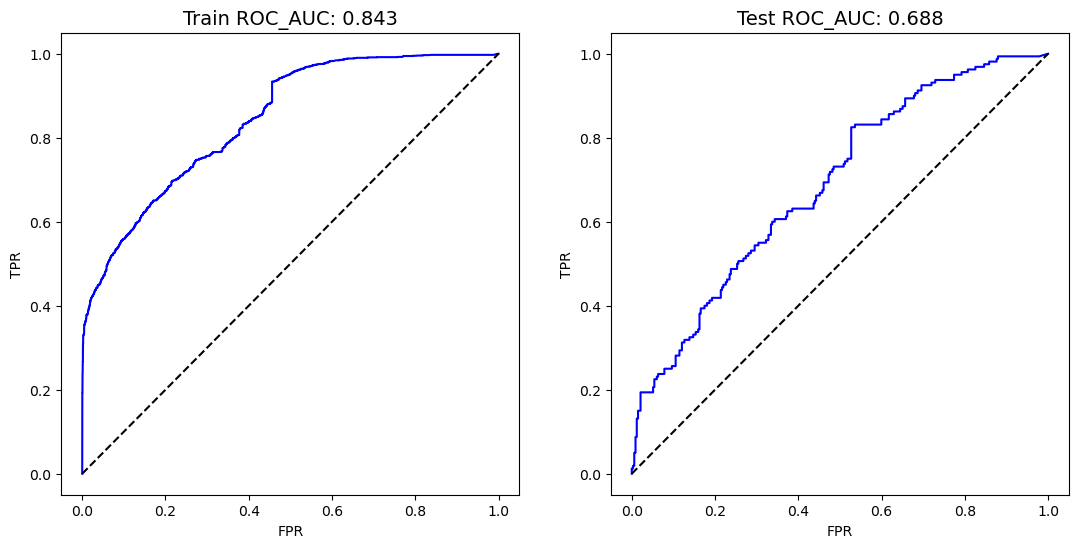

In [ ]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

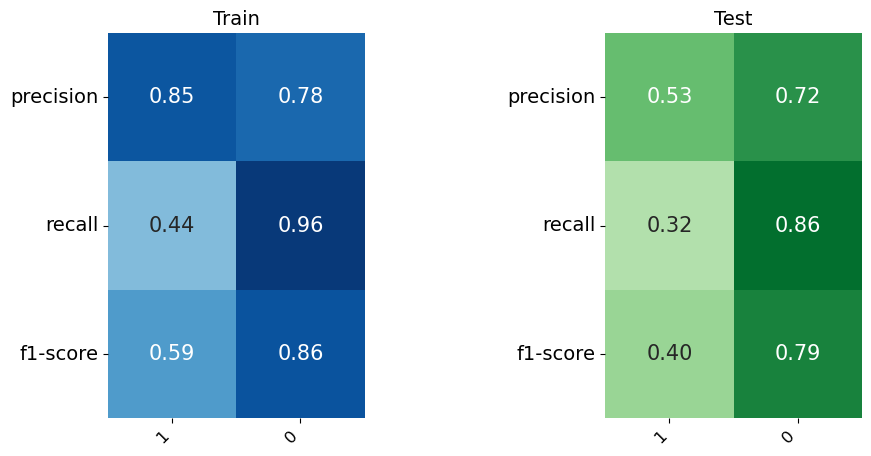

In [ ]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

### Prediksi

In [ ]:
pred_data = ['aplikasi gojek jelek banget']